In [1]:
import pandas as pd
import random
import numpy as np

In [2]:
audio_emy_df = pd.read_json("audio_features/audio_features_emily.json", lines = True)
display('audio_emy_df shape:', audio_emy_df.shape)
audio_emy_df.head()

'audio_emy_df shape:'

(658, 13)

,playlist_name,song_name,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id
0,sons of god ❤️,Pão e Vinho,0.613,0.546,-7.899,1,0.0238,0.7470,0.0,0.123,0.353,87.949,0Q1AoxhnaixaZoh59Ix1O0
1,sons of god ❤️,Estar em Tuas Mãos,0.362,0.708,-6.720,1,0.0340,0.0335,0.0,0.268,0.470,171.937,4kD9RFiO3lNkMTogn61gSk
2,sons of god ❤️,Glória a Deus nas Alturas,0.626,0.829,-6.173,1,0.0382,0.0121,0.0,0.106,0.701,126.049,7nkW6Nn4TLxIcLHClcAO09
3,sons of god ❤️,Eu Escolho Deus - Ao Vivo,0.484,0.388,-11.161,1,0.0478,0.7750,0.0,0.752,0.289,119.780,2MaKWxPGQ6zocvj2ciYREO
4,sons of god ❤️,Mesmo Sem Entender - Ao Vivo,0.473,0.304,-13.385,1,0.0781,0.8340,0.0,0.607,0.293,103.642,65XnT7szSYXvWi2qnmzy7o


In [3]:
audio_jhon_df = pd.read_json("audio_features/audio_features.json", lines = True)
display('audio_jhon_df shape:', audio_jhon_df.shape)
audio_jhon_df.head()

'audio_jhon_df shape:'

(1762, 13)

,playlist_name,song_name,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id
0,This Is NF,PAID MY DUES,0.812,0.784,-4.208,1,0.248,0.136,0.0,0.1090,0.380,145.995,18czZN7uruOjftj71Kt8oj
1,This Is NF,The Search,0.789,0.786,-4.788,1,0.297,0.596,0.0,0.0997,0.390,119.957,2OKo7g3KfmCt3kyLvUAL0g
2,This Is NF,Time - Edit,0.665,0.703,-3.885,1,0.070,0.128,0.0,0.1150,0.257,97.968,68Vm2W4oURsPV3121vUZgB
3,This Is NF,Leave Me Alone,0.722,0.741,-3.720,1,0.190,0.249,0.0,0.1510,0.460,162.110,3EtyEzMpfKSaoVhPunvbRV
4,This Is NF,Change,0.784,0.753,-4.099,0,0.213,0.438,0.0,0.1670,0.532,116.959,4cBlIM5AjnQ74f52Dv7T5K


## Data Set Balancing
As we can see below, we have way more songs in my playlist. So, in order to have a fair comparison between the data sets, we have to balance both of them. To do that, let's create a for loop that goes through my dataframe and randomly drops some rows of the most frequently occurring artists. 

In [4]:
# Create a dictionary in which the keys are the artists of my list and the values are the total of songs for each singer or group.
my_dict = dict(audio_jhon_df.playlist_name.value_counts())
my_dict

{'Pagode 2018 / 2019': 100,
 '0 to 100 nigga, real quick.': 100,
 'Rock 80-90 internacional': 100,
 'Sertanejo 2020 Julho - TOP 100 Músicas Sertanejas Mais Tocadas (Sucessos Sertanejos 2020)': 100,
 'Dilsinho/Ferrugem/Sorriso Maroto/Turma do Pagode/Ta na Mente/Thiaguinho/Péricles/Exalta Samba/Pixote': 100,
 'Rap,Hip Hop, R&B': 100,
 'Pagode 2019: Melhores Pagodes 2019': 93,
 'This Is Drake': 74,
 'rock 80-90 ': 72,
 'rap': 65,
 'This Is Iron Maiden': 62,
 'This Is NF': 52,
 'This Is Stratovarius': 50,
 'Frank Sinatra Radio': 50,
 'This Is Black Sabbath': 50,
 'Johann Sebastian Bach Radio': 50,
 'This Is Cradle Of Filth': 50,
 'Jazz': 50,
 'This Is Angra': 50,
 'This Is Keane': 50,
 'This Is The Killers': 46,
 'This Is Zé Ramalho': 42,
 'This Is Rob Bailey & The Hustle Standard': 39,
 'This Is A Day To Remember': 36,
 'pagode': 32,
 "This Is Racionais MC's": 31,
 'This Is Sabotage': 28,
 'This Is Al Green': 26,
 'ferrugem, dilsinho e sorriso maroto': 22,
 'Tiee – Tiee': 16,
 'the offspr

Podemos ver notoriamente que os datasets estão desbalanceados. Para realizar esse balanceamento eu vou fazer jus to conhecimento que possuo a respeito do meu gosto musical e da frequência em qu escudo cada playlist. Temos que ter em mente que para deletar dados, devemos ter um profundo conhecimento do business em que estamos inseridos. Nesse caso, eu posso realizar esse processo sem peso na consciência devido ao fato de eu ter um profundo conhecimento das musicas e artistas que escuto com mais frequência.

vou fazer o seguinte:
* Deletar playlists que escuto com pouca frequência (algumas delas eu nem sei o motivo de estarem alí)
* Determinar uma certa porcentagem de musicas a serem deletadas randomicamente de cada playlist restante (considerando tamnbém a frequência em que escudo a playlist) 

In [5]:
index_list = audio_jhon_df.loc[audio_jhon_df['playlist_name'] == 'the offspring', : ].index.to_list()
random.shuffle(index_list)

In [6]:
playlist_to_drop = ['Liked from Radio','the offspring', 'This Is Rob Bailey & The Hustle Standard','This Is Zé Ramalho'
                   ,'This Is Cradle Of Filth','This Is Drake','This Is Keane','Rap,Hip Hop, R&B','This Is The Killers'] 

for playlist in playlist_to_drop:
    
    index_list = audio_jhon_df.loc[audio_jhon_df['playlist_name'] == playlist, : ].index.to_list()
    
    audio_jhon_df.drop(index_list, inplace = True)
    
    
    
    

In [7]:
audio_jhon_df.shape

(1346, 13)

In [8]:
my_dict = dict(audio_jhon_df.playlist_name.value_counts())
my_dict

{'Pagode 2018 / 2019': 100,
 'Rock 80-90 internacional': 100,
 'Sertanejo 2020 Julho - TOP 100 Músicas Sertanejas Mais Tocadas (Sucessos Sertanejos 2020)': 100,
 '0 to 100 nigga, real quick.': 100,
 'Dilsinho/Ferrugem/Sorriso Maroto/Turma do Pagode/Ta na Mente/Thiaguinho/Péricles/Exalta Samba/Pixote': 100,
 'Pagode 2019: Melhores Pagodes 2019': 93,
 'rock 80-90 ': 72,
 'rap': 65,
 'This Is Iron Maiden': 62,
 'This Is NF': 52,
 'This Is Stratovarius': 50,
 'Johann Sebastian Bach Radio': 50,
 'This Is Angra': 50,
 'Frank Sinatra Radio': 50,
 'Jazz': 50,
 'This Is Black Sabbath': 50,
 'This Is A Day To Remember': 36,
 'pagode': 32,
 "This Is Racionais MC's": 31,
 'This Is Sabotage': 28,
 'This Is Al Green': 26,
 'ferrugem, dilsinho e sorriso maroto': 22,
 'Tiee – Tiee': 16,
 'Tiee': 11}

In [9]:
song_percent = {'Rock 80-90 internacional': 0.8,
                  '0 to 100 nigga, real quick.': 0.8,
                  'rock 80-90 ': 0.8,
                  'This Is Iron Maiden': 0.6,
                  'This Is Angra': 0.6, 
                  'Frank Sinatra Radio': 0.7,
                  'Johann Sebastian Bach Radio' : 0.3,
                   'Jazz': 0.8,
                  'This Is Stratovarius': 0.7 ,
                  'This Is A Day To Remember': 0.8}

for k, v in song_percent.items():
        
    index_list = audio_jhon_df.loc[audio_jhon_df['playlist_name'] == k, : ].index.to_list()
    
    random.shuffle(index_list)
    
    number_of_elem_to_keep = int(len(index_list) * (1-v) )
    
    list_of_elem_to_drop = index_list[number_of_elem_to_keep:]
    
    audio_jhon_df.drop(list_of_elem_to_drop, inplace = True)


In [10]:
audio_jhon_df.shape

(903, 13)

In [11]:
my_dict = dict(audio_jhon_df.playlist_name.value_counts())
my_dict

{'Pagode 2018 / 2019': 100,
 'Sertanejo 2020 Julho - TOP 100 Músicas Sertanejas Mais Tocadas (Sucessos Sertanejos 2020)': 100,
 'Dilsinho/Ferrugem/Sorriso Maroto/Turma do Pagode/Ta na Mente/Thiaguinho/Péricles/Exalta Samba/Pixote': 100,
 'Pagode 2019: Melhores Pagodes 2019': 93,
 'rap': 65,
 'This Is NF': 52,
 'This Is Black Sabbath': 50,
 'Johann Sebastian Bach Radio': 35,
 'pagode': 32,
 "This Is Racionais MC's": 31,
 'This Is Sabotage': 28,
 'This Is Al Green': 26,
 'This Is Iron Maiden': 24,
 'ferrugem, dilsinho e sorriso maroto': 22,
 'This Is Angra': 20,
 '0 to 100 nigga, real quick.': 19,
 'Rock 80-90 internacional': 19,
 'Tiee – Tiee': 16,
 'This Is Stratovarius': 15,
 'Frank Sinatra Radio': 15,
 'rock 80-90 ': 14,
 'Tiee': 11,
 'Jazz': 9,
 'This Is A Day To Remember': 7}

In [12]:
#my_list = [1,2,3,4,5,6,7,8,9,10]
#numbers_to_keep = int(len(my_list) *  0.6)

#newlist = my_list[numbers_to_keep:]
#newlist

In [13]:
display('Shape features_emy_df:',audio_jhon_df.shape)
display('Shape features_emy_df:' ,audio_emy_df.shape)

'Shape features_emy_df:'

(903, 13)

'Shape features_emy_df:'

(658, 13)

In [14]:
# Setting new column to identify the users
audio_jhon_df['who'] = 1
audio_emy_df['who'] = 0

In [15]:
# joining both data frames 
df_couple = audio_jhon_df.append(audio_emy_df)
df_couple

,playlist_name,song_name,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,who
0,This Is NF,PAID MY DUES,0.812,0.784,-4.208,1,0.2480,0.13600,0.000000,0.1090,0.380,145.995,18czZN7uruOjftj71Kt8oj,1
1,This Is NF,The Search,0.789,0.786,-4.788,1,0.2970,0.59600,0.000000,0.0997,0.390,119.957,2OKo7g3KfmCt3kyLvUAL0g,1
2,This Is NF,Time - Edit,0.665,0.703,-3.885,1,0.0700,0.12800,0.000000,0.1150,0.257,97.968,68Vm2W4oURsPV3121vUZgB,1
3,This Is NF,Leave Me Alone,0.722,0.741,-3.720,1,0.1900,0.24900,0.000000,0.1510,0.460,162.110,3EtyEzMpfKSaoVhPunvbRV,1
4,This Is NF,Change,0.784,0.753,-4.099,0,0.2130,0.43800,0.000000,0.1670,0.532,116.959,4cBlIM5AjnQ74f52Dv7T5K,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,Amy Winehouse,Love Is A Losing Game,0.480,0.561,-5.874,1,0.0270,0.31700,0.006410,0.1840,0.541,164.791,570ZDO2Lmh6NQChOU5xPUL,0
654,Amy Winehouse,He Can Only Hold Her,0.651,0.835,-4.311,0,0.0649,0.02620,0.006850,0.0560,0.692,98.411,0sSdFMuYrn3N9moumV466B,0
655,Amy Winehouse,Addicted,0.786,0.846,-3.752,1,0.0391,0.00144,0.017200,0.1010,0.695,107.976,7or26qS3BfpTtWO3BFw5GE,0
656,Amy Winehouse,Wake Up Alone,0.384,0.527,-5.294,0,0.0269,0.54200,0.000000,0.1560,0.222,100.730,37A5PvtftHtsISQUDFNGUk,0


In [16]:
# Create data frame with features
def features(df,who):
    if who == 'both':
         features = df.loc[: ,['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence', 'who']]         
    elif who == 0 or who == 1:   
          features = df.loc[df.who == who,['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']]           
    else:
        return 'Error'
    return features

In [17]:
features_jhon = features(df_couple, 1)
features_emy = features(df_couple,0)
display('Jonathan:',features_jhon.head())
display('Emily :',features_emy.head())

'Jonathan:'

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
0,0.136,0.812,0.784,0.0,0.1090,0.248,0.380
1,0.596,0.789,0.786,0.0,0.0997,0.297,0.390
2,0.128,0.665,0.703,0.0,0.1150,0.070,0.257
3,0.249,0.722,0.741,0.0,0.1510,0.190,0.460
4,0.438,0.784,0.753,0.0,0.1670,0.213,0.532


'Emily :'

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
0,0.7470,0.613,0.546,0.0,0.123,0.0238,0.353
1,0.0335,0.362,0.708,0.0,0.268,0.0340,0.470
2,0.0121,0.626,0.829,0.0,0.106,0.0382,0.701
3,0.7750,0.484,0.388,0.0,0.752,0.0478,0.289
4,0.8340,0.473,0.304,0.0,0.607,0.0781,0.293


In [18]:
display('Emy:', audio_emy_df.playlist_name.value_counts())
print()
display('Jonathan:',audio_jhon_df.playlist_name.value_counts())

'Emy:'

Chora não coleguinha!    100
Pagodin                  100
Pistão                    99
Lovesongs                 91
Emy                       87
breakfast                 69
Olders                    42
sons of god ❤️            27
ana&gadu<3                26
Amy Winehouse             17
Name: playlist_name, dtype: int64

'Jonathan:'

Pagode 2018 / 2019                                                                                      100
Sertanejo 2020 Julho - TOP 100 Músicas Sertanejas Mais Tocadas (Sucessos Sertanejos 2020)               100
Dilsinho/Ferrugem/Sorriso Maroto/Turma do Pagode/Ta na Mente/Thiaguinho/Péricles/Exalta Samba/Pixote    100
Pagode 2019: Melhores Pagodes 2019                                                                       93
rap                                                                                                      65
This Is NF                                                                                               52
This Is Black Sabbath                                                                                    50
Johann Sebastian Bach Radio                                                                              35
pagode                                                                                                   32
This Is Racionais MC's      

## Data Analysis

In [19]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

/home/jonathan/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


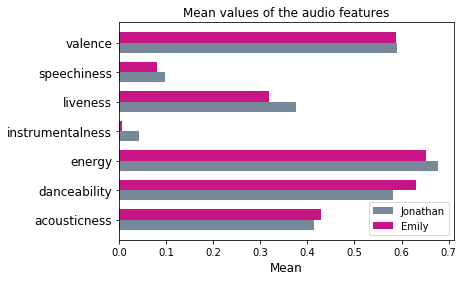

In [20]:
# Number of features
N = len(features_jhon.mean())
# Array with the number of features
ind = np.arange(N) 

width = 0.35  
#Bar plot with my list
plt.barh(ind, features_jhon.mean() , width, label='Jonathan', color = 'lightslategray')
#Bar plot with her list
plt.barh(ind + width, features_emy.mean(), width, label='Emily', color = 'mediumvioletred')

#X- label
plt.xlabel('Mean', fontsize = 12)
# Title
plt.title('Mean values of the audio features')
#Vertical ticks
plt.yticks(ind + width / 2, (list(features_emy)[:]), fontsize = 12)
#legend
plt.legend(loc='best')
# Figure size
plt.rcParams['figure.figsize'] =(6,6)
# Set style
style.use("ggplot")

plt.show()

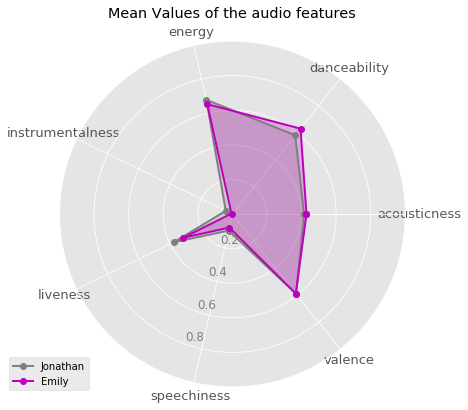

In [21]:
labels= list(features_jhon)[:]
stats= features_jhon.mean().tolist()
stats2 = features_emy.mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
stats2 =np.concatenate((stats2,[stats2[0]])) 
angles=np.concatenate((angles,[angles[0]]))

#Size of the figure
fig= plt.figure(figsize = (16,14))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "Jonathan", color= 'gray')
ax.fill(angles, stats, alpha=0.25, facecolor='gray')
ax.set_thetagrids(angles * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

ax.plot(angles, stats2, 'o-', linewidth=2, label = "Emily", color = 'm')
ax.fill(angles, stats2, alpha=0.25, facecolor='m' )
ax.set_title('Mean Values of the audio features')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

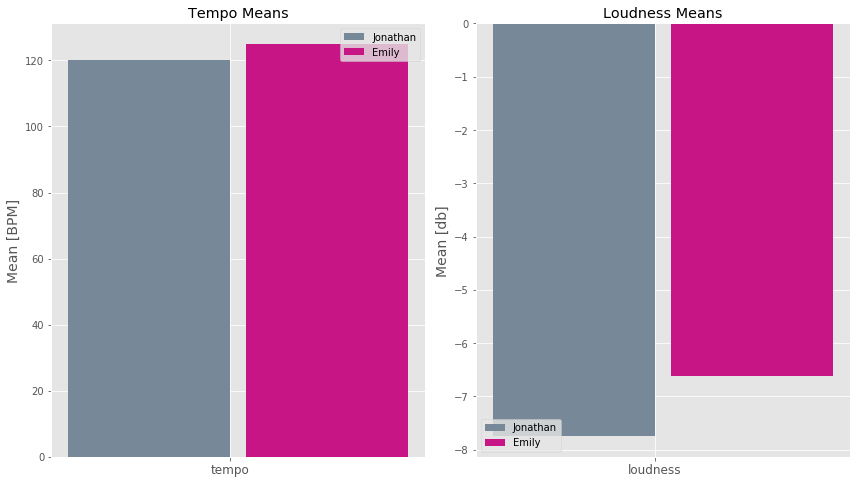

In [23]:
tempo_emy = df_couple.loc[ df_couple.who == 0, ['tempo']]
tempo_jhon = df_couple.loc[ df_couple.who == 1, ['tempo']]

N = len(tempo_emy.mean())

ind = np.arange(N) 

plt.subplot(221)
width = 0.35      
plt.bar(ind, tempo_jhon.mean() , width, label='Jonathan', color = 'lightslategray')
plt.bar(ind + 1.1*width, tempo_emy.mean(), width, label='Emily', color = 'mediumvioletred')

plt.ylabel('Mean [BPM]', fontsize = 14)
plt.title('Tempo Means')

plt.xticks(ind + width / 2, (list(tempo_emy)[:]), fontsize = 12)
plt.legend(loc='best')
style.use("ggplot")


plt.subplot(222)

loud_emy = df_couple.loc[ df_couple.who == 0, ['loudness']]
loud_jhon = df_couple.loc[ df_couple.who == 1, ['loudness']]

N = len(loud_emy.mean())

ind = np.arange(N) 

width = 0.35      
plt.bar(ind, loud_jhon.mean() , width, label='Jonathan', color = 'lightslategray')
plt.bar(ind + 1.1*width, loud_emy.mean(), width, label='Emily', color = 'mediumvioletred')

plt.ylabel('Mean [db]', fontsize = 14)
plt.title('Loudness Means')



plt.xticks(ind + width / 2, (list(loud_emy)[:]), fontsize = 12)
plt.legend(loc='lower left')
style.use("ggplot")
plt.rcParams['figure.figsize'] =(12,13)
plt.tight_layout()
plt.show()

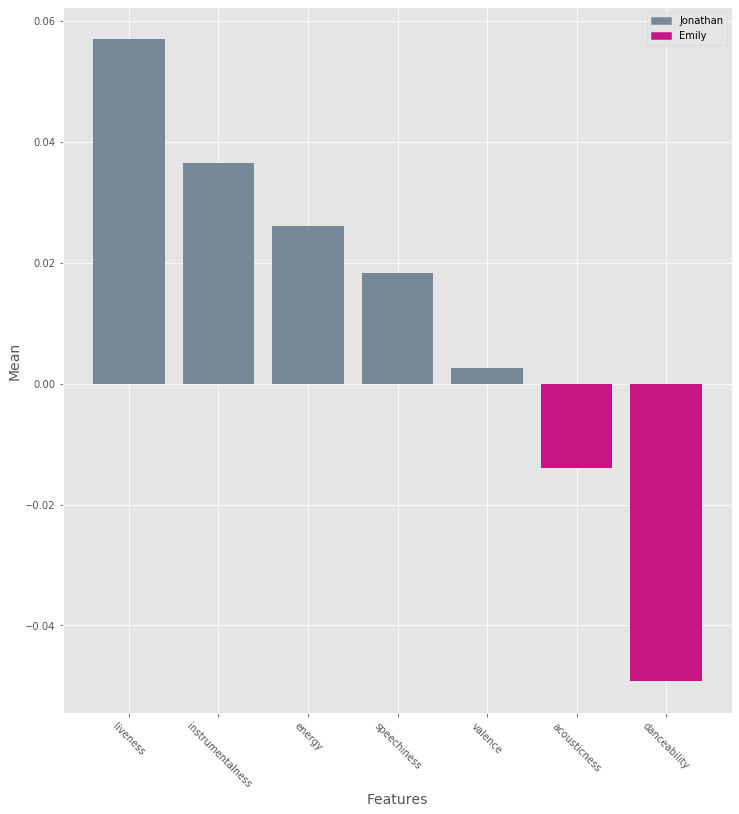

In [25]:

colors = ['lightslategray','lightslategray','lightslategray',
          'lightslategray','lightslategray','mediumvioletred','mediumvioletred']
dif_features = features_jhon.mean() - features_emy.mean()

index = dif_features.sort_values(ascending = False).index

#Plot
fig, ax = plt.subplots()
x = np.arange(dif_features.count())
y = dif_features.sort_values(ascending = False)
plt.bar(x,y, color = colors)
plt.xticks(x, (features_jhon.columns))
ax.set_xticklabels(index, rotation=-45)



#Create Legend
import matplotlib.patches as mpatches
gray_patch = mpatches.Patch(color ='lightslategray', label = 'Jonathan')
violet_patch = mpatches.Patch(color = 'mediumvioletred', label = 'Emily')
plt.legend(handles = [gray_patch,violet_patch], loc = 'upper right')

#labels
plt.ylabel('Mean', fontsize = 14)
plt.xlabel('Features', fontsize = 14)
plt.show()

## How diversified are the lists ?!

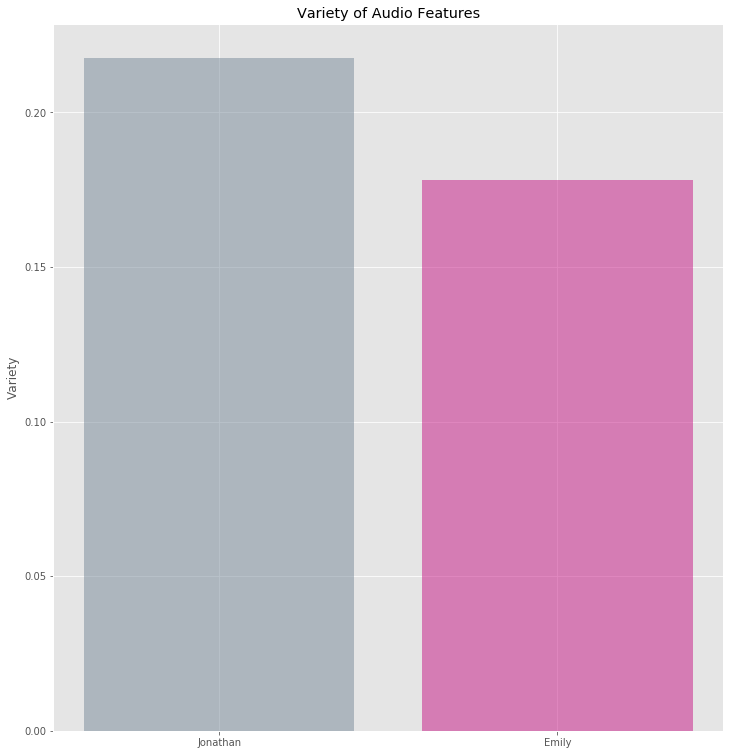

In [27]:
data = [features_jhon.std().mean(), features_emy.std().mean()]
names = ('Jonathan','Emily')
pos = np.arange(len(names))
colors = ['lightslategray', 'mediumvioletred']

plt.bar(pos, data, align = 'center', alpha = 0.5, color = colors)
plt.xticks(pos, names)
plt.ylabel('Variety')
plt.title('Variety of Audio Features')
plt.show()

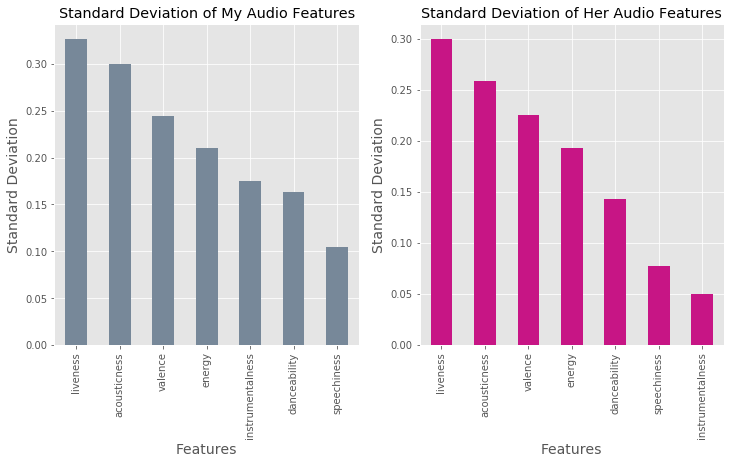

In [28]:

plt.subplot(221)

features_jhon.std().sort_values(ascending= False).plot(kind = 'bar', color = 'lightslategray')

plt.xlabel('Features', fontsize = 14)
plt.ylabel('Standard Deviation', fontsize = 14)
plt.title("Standard Deviation of My Audio Features")

plt.subplot(222)
features_emy.std().sort_values(ascending= False).plot(kind = 'bar', color = 'mediumvioletred')

plt.xlabel('Features', fontsize = 14)
plt.ylabel('Standard Deviation', fontsize = 14)
plt.title("Standard Deviation of Her Audio Features")
plt.rcParams['figure.figsize'] =(15,15)

## Correlation Between Variables

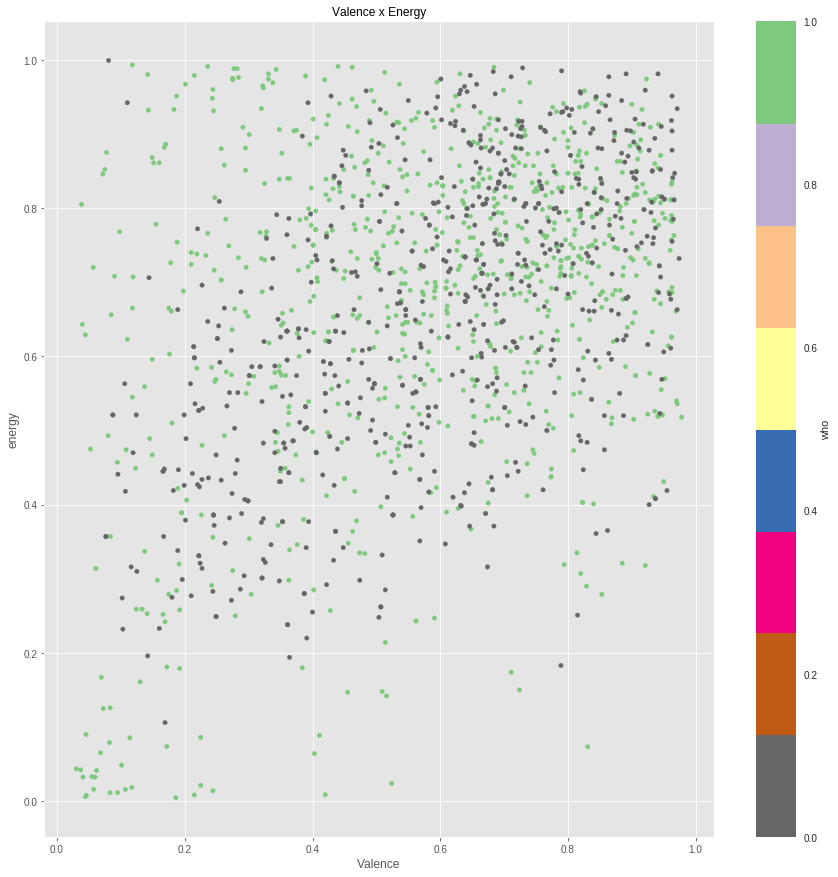

In [29]:
fig, ax = plt.subplots()
style.use('seaborn')
df_couple.plot(kind='scatter',x='valence', y='energy',ax = ax ,c='who', colormap = 'Accent_r' ,title="Valence x Energy")
ax.set_xlabel("Valence")
plt.show()

## Valence and Danceability

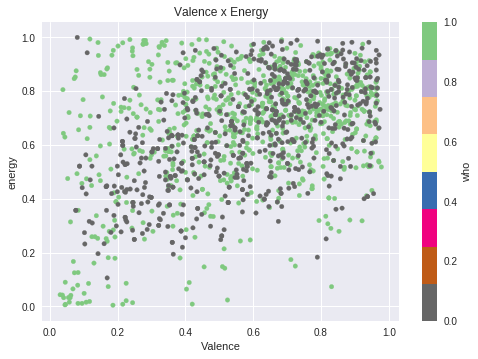

In [30]:
fig, ax = plt.subplots()
style.use('seaborn')
df_couple.plot(kind='scatter',x='valence', y='energy',ax = ax ,c='who', colormap = 'Accent_r' ,title="Valence x Energy")
ax.set_xlabel("Valence")
plt.show()

## The Machine Learning Approach

In [32]:
df_couple.head(2)

,playlist_name,song_name,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,who
0,This Is NF,PAID MY DUES,0.812,0.784,-4.208,1,0.248,0.136,0.0,0.1090,0.38,145.995,18czZN7uruOjftj71Kt8oj,1
1,This Is NF,The Search,0.789,0.786,-4.788,1,0.297,0.596,0.0,0.0997,0.39,119.957,2OKo7g3KfmCt3kyLvUAL0g,1


In [33]:
# Remove columns
def features_removal(features_list):
    for i in features_list:
        df_couple.drop(i, axis = 1, inplace = True)
    return ';)'


In [ ]:

# Apply function
features_removal(['id', 'album', 'name', 'popularity', 'track_number', 'uri'])
df_couple.head(3)